In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
Cab_Data = pd.read_csv("C:\Internship\Cab_Data.csv")

In [6]:
Cab_Data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,8/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,6/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,7/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,3/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [8]:
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'],format='%d/%m/%Y')

In [9]:
City = pd.read_csv("C:\Internship\City.csv")
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [10]:
City.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
Customer_data = pd.read_csv("C:\Internship\Customer_ID.csv")
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
Customer_data.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
Transaction_data = pd.read_csv("C:\Internship\Transaction_ID.csv")
Transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [14]:
Transaction_data.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
USholiday = pd.read_csv(r"C:\Internship\US Holiday Dates.csv")

In [16]:
USholiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,4/07/2004,4th of July,Sunday,7,4,2004
1,4/07/2005,4th of July,Monday,7,4,2005
2,4/07/2006,4th of July,Tuesday,7,4,2006
3,4/07/2007,4th of July,Wednesday,7,4,2007
4,4/07/2008,4th of July,Friday,7,4,2008


In [17]:
USholiday['Date'] = pd.to_datetime(USholiday['Date'],format='%d/%m/%Y')

# Merging Datasets

In [18]:
merge_data_left = pd.DataFrame()
merge_data_inner = pd.DataFrame()

In [19]:
Transaction_data['Transaction ID'].count(), Transaction_data['Transaction ID'].nunique()

(440098, 440098)

#### Checking both inner as well as left merge to decide which one would be best for analysis purposes

#### Merge 1

In [20]:
## Merging Transaction_data with Cab_Data

merge_data_left = pd.merge(Transaction_data, Cab_Data,how='left',on='Transaction ID')
merge_data_inner = pd.merge(Transaction_data, Cab_Data,how='inner',on='Transaction ID')

In [21]:
merge_data_left['Transaction ID'].count(), merge_data_left['Transaction ID'].nunique() 

(440098, 440098)

In [22]:
merge_data_inner['Transaction ID'].count(), merge_data_inner['Transaction ID'].nunique()

(359392, 359392)

In [23]:
merge_data_left.head(3)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632


#### Merge 2

In [24]:
## Merging merge_data_left with Cab_Data

merge_data_left = pd.merge(merge_data_left, Customer_data,how='left',on='Customer ID')
merge_data_inner = pd.merge(merge_data_inner, Customer_data,how='inner',on='Customer ID')

In [25]:
merge_data_left['Transaction ID'].count(), merge_data_left['Transaction ID'].nunique() 

(440098, 440098)

In [26]:
merge_data_inner['Transaction ID'].count(), merge_data_inner['Transaction ID'].nunique()

(359392, 359392)

In [27]:
merge_data_left.head(3)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242


#### Merge 3

In [28]:
## Merging merge_data_left with City

merge_data_left = pd.merge(merge_data_left, City,how='left',on='City')
merge_data_inner = pd.merge(merge_data_inner, City,how='inner',on='City')

In [29]:
merge_data_left['Transaction ID'].count(), merge_data_left['Transaction ID'].nunique() 

(440098, 440098)

In [30]:
merge_data_inner['Transaction ID'].count(), merge_data_inner['Transaction ID'].nunique()

(359392, 359392)

In [31]:
merge_data_left.head(3)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701"
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701"
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701"


In [32]:
merge_data_inner.head(3)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701"


#### Merge 4 with additional dataset - 'USholiday'

In [33]:
# Merging merge_data_left with USholiday

merge_data_left = pd.merge(merge_data_left, USholiday,how='left',left_on='Date of Travel',right_on ='Date')
merge_data_inner = pd.merge(merge_data_inner, USholiday,how='inner',left_on='Date of Travel', right_on='Date')

In [34]:
merge_data_left.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday,WeekDay,Month,Day,Year
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701",NaT,NaN,NaN,NaN,NaN,NaN
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701",NaT,NaN,NaN,NaN,NaN,NaN
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701",NaT,NaN,NaN,NaN,NaN,NaN
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,"814,885","24,701",NaT,NaN,NaN,NaN,NaN,NaN
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,"814,885","24,701",NaT,NaN,NaN,NaN,NaN,NaN


In [35]:
merge_data_left['Date'].isnull().sum()

421454

In [36]:
merge_data_inner.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday,WeekDay,Month,Day,Year
0,10072285,27318,Card,2016-09-04,Pink Cab,ATLANTA GA,45.20,539.01,479.1200,Male,25,13984,"814,885","24,701",2016-09-04,Labor Day Weekend,Sunday,9,4,2016
1,10073170,29558,Card,2016-09-04,Yellow Cab,ATLANTA GA,29.38,585.56,401.9184,Male,27,9555,"814,885","24,701",2016-09-04,Labor Day Weekend,Sunday,9,4,2016
2,10073189,29763,Card,2016-09-04,Yellow Cab,ATLANTA GA,10.53,185.18,144.0504,Male,47,15309,"814,885","24,701",2016-09-04,Labor Day Weekend,Sunday,9,4,2016
3,10069464,29990,Card,2016-09-04,Pink Cab,ATLANTA GA,36.36,388.58,429.0480,Male,61,18475,"814,885","24,701",2016-09-04,Labor Day Weekend,Sunday,9,4,2016
4,10072292,27925,Card,2016-09-04,Pink Cab,ATLANTA GA,37.83,458.97,438.8280,Female,24,23541,"814,885","24,701",2016-09-04,Labor Day Weekend,Sunday,9,4,2016


In [37]:
merge_data_inner['Transaction ID'].count(), merge_data_inner['Transaction ID'].nunique()

(19106, 18644)

In [38]:
merge_data_left['Transaction ID'].count(),merge_data_left['Transaction ID'].nunique()

(440560, 440098)

In [39]:
440560 - 19106

421454

##### On comparing both type of merges - inner and left, I have decided to use left merge data as it has much more date available as compared to inner join as calculated in the above cells

# Detection

In [40]:
merge_data_left.isnull().sum()

Transaction ID             0
Customer ID                0
Payment_Mode               0
Date of Travel         80706
Company                80706
City                   80706
KM Travelled           80706
Price Charged          80706
Cost of Trip           80706
Gender                     0
Age                        0
Income (USD/Month)         0
Population             80706
Users                  80706
Date                  421454
Holiday               421454
WeekDay               421454
Month                 421454
Day                   421454
Year                  421454
dtype: int64

#### Detecting duplicates

In [41]:
merge_data_left.duplicated().sum()

0

In [42]:
##duplicate_rows = merge_data_left[merge_data_left.duplicated()]

# Treatments

#### Removing duplicates

In [43]:
merge_data_left.drop_duplicates(inplace=True)

In [44]:
merge_data_left.duplicated().sum()

0

## NUll Value Treatments

#### dropping null value columns

In [45]:
drop_cols =['WeekDay','Month','Day','Year']
merge_data_left =merge_data_left.drop(columns = drop_cols)

# Creating a new feature to find out if the date of travel and holiday date are same for analysis


#### Converting all NUll Values in df_final ['Date'] column to today's date to be able to create Holiday feature

In [46]:
today = dt.datetime.now()

In [47]:
merge_data_left['Date'] = merge_data_left['Date'].fillna(today)

#### Checking if 'Date' and "Date of Travel' have the same format before creating the feature

In [48]:
merge_data_left['Date of Travel'][0]

Timestamp('2016-01-08 00:00:00')

In [49]:
merge_data_left[~(merge_data_left['Date'] == today) ]['Date'][1384]

Timestamp('2016-01-18 00:00:00')

In [50]:
merge_data_left['Holiday'] = np.where( (merge_data_left['Date of Travel']== merge_data_left['Date']), 'Yes', 'No')

#### Filter NULL values

In [51]:
df_final = merge_data_left.dropna(subset = ['Cost of Trip'])

In [52]:
merge_data_left['Transaction ID'].count(), df_final['Transaction ID'].count(), 

(440560, 359854)

In [53]:
df_final.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Date                  0
Holiday               0
dtype: int64

In [166]:
df_final.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,...,Income (USD/Month),Population,Users,Holiday,Profit,Year,Month,Income Group,Age Group,Travel Matches Holiday
549,10000560,4021,Card,2016-01-02,Yellow Cab,CHICAGO IL,18.08,406.95,221.2992,Male,...,30186,"1,955,130","164,468",No,185.6508,2016,1,Medium,Middle-Aged,0
457,10000468,4269,Cash,2016-01-02,Yellow Cab,CHICAGO IL,27.30,583.42,383.2920,Male,...,19370,"1,955,130","164,468",No,200.1280,2016,1,Low,Super Senior,0
639,10000650,3778,Card,2016-01-02,Yellow Cab,CHICAGO IL,40.66,1005.24,522.0744,Male,...,12755,"1,955,130","164,468",No,483.1656,2016,1,Low,Middle-Aged,0
901,10000912,2731,Cash,2016-01-02,Yellow Cab,NEW YORK NY,13.86,407.20,174.6360,Male,...,22350,"8,405,837","302,149",No,232.5640,2016,1,Low,Middle-Aged,0
1221,10001232,37393,Card,2016-01-02,Yellow Cab,SEATTLE WA,16.24,540.27,210.4704,Male,...,22205,"671,238","25,063",No,329.7996,2016,1,Low,Young,0


In [55]:
df_final['Holiday'].value_counts()

No     340748
Yes     19106
Name: Holiday, dtype: int64

# Detecting Outliers

In [56]:
df_final.describe(percentiles = [.01,.1,.25,.50,.75,.90,.99])

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
count,3.598540e+05,359854.000000,359854.000000,359854.000000,359854.000000,359854.000000,359854.000000
mean,1.022069e+07,19194.701346,22.567304,423.517722,286.196987,35.336448,15048.269943
std,1.267400e+05,21014.265474,12.232944,274.455816,157.989831,12.594056,7969.495205
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000,18.000000,2000.000000
1%,1.000465e+07,108.000000,2.100000,33.600000,26.373600,18.000000,2233.000000
10%,1.004566e+07,1080.000000,5.800000,99.250000,72.594000,21.000000,4525.000000
25%,1.011093e+07,2705.000000,12.000000,206.500000,151.200000,25.000000,8419.000000
50%,1.022080e+07,7459.000000,22.440000,386.425000,282.480000,33.000000,14684.500000
75%,1.033082e+07,36087.750000,32.960000,583.740000,413.683200,42.000000,21034.000000
90%,1.039683e+07,53780.000000,39.200000,793.000000,502.512000,56.000000,24793.000000


## Making a list of continuous columns variable for box plot



In [57]:
num_col = list(df_final.select_dtypes(include = ['int64' , 'float64']).columns)
num_col

['Transaction ID',
 'Customer ID',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Age',
 'Income (USD/Month)']

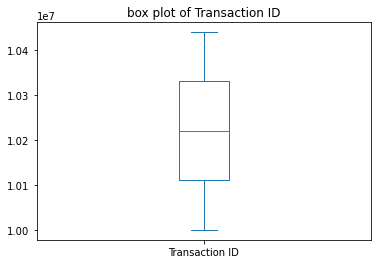

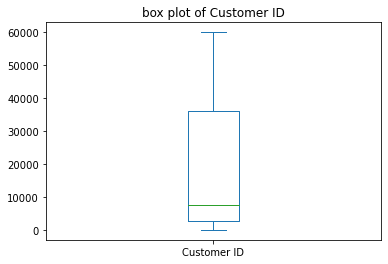

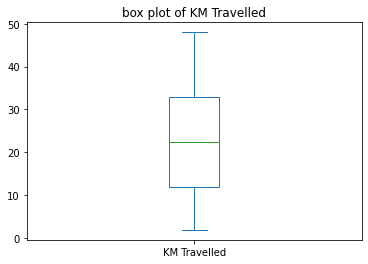

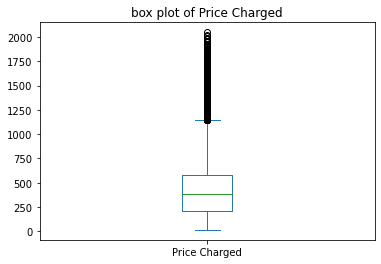

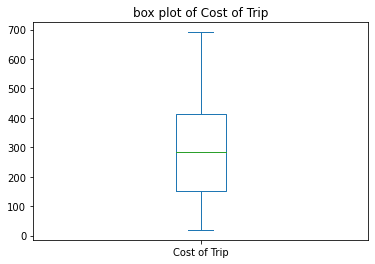

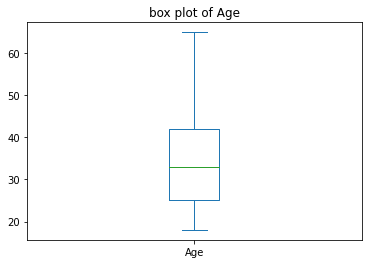

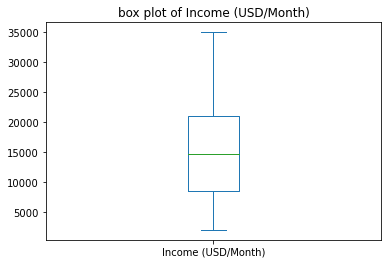

In [58]:
for column in num_col:
    df_final[column].plot(kind='box')
    plt.title(f'box plot of {column}')
    plt.show()

# Analysis

In [59]:
df_final.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701",2023-10-15 09:14:56.556659,No
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701",2023-10-15 09:14:56.556659,No
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701",2023-10-15 09:14:56.556659,No
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,"814,885","24,701",2023-10-15 09:14:56.556659,No
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,"814,885","24,701",2023-10-15 09:14:56.556659,No


### Dropping Date column

In [60]:
df_final = df_final.drop('Date', axis=1)

In [61]:
df_final.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Holiday
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701",No
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701",No
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701",No
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,"814,885","24,701",No
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,"814,885","24,701",No


In [60]:
##df_final.to_csv(r"C:\Users\tanvi\Documents", index=False)

In [61]:
#Areas to investigate

#Which company has maximum cab users at a particular time period?
#Does margin proportionally increase with increase in number of customers?
#What are the attributes of these customer segments?

#holidays vs travel frequency

#profit forecasting


In [62]:
## Create a new feature -- profit

df_final['Profit'] = df_final['Price Charged'] - df_final['Cost of Trip']

In [63]:
## Create Year and Month feature

df_final['Year'] = df_final['Date of Travel'].dt.year
df_final['Month'] = df_final['Date of Travel'].dt.month

In [64]:
df_final.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Holiday,Profit,Year,Month
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701",No,57.315,2016,1
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701",No,23.666,2016,1
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701",No,27.568,2016,1
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,"814,885","24,701",No,25.798,2016,1
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,"814,885","24,701",No,16.844,2016,1


In [113]:
grouped_data = df_final.groupby(['Company', 'Year','Month']).agg({
    "Transaction ID": pd.Series.count,
    "Customer ID": pd.Series.nunique,
    "Price Charged": sum,
    "Cost of Trip": sum,
    "Profit": sum,
})

grouped_data.reset_index(inplace=True)

In [114]:
grouped_data = grouped_data.rename(columns={
    "Transaction ID": "Total Transactions",
    "Customer ID": "Total Customers",
    "Price Charged": "Total Revenue",
    "Cost of Trip": "Total Cost",
    "Profit": "Total Profit"
})

In [115]:
grouped_data

,Company,Year,Month,Total Transactions,Total Customers,Total Revenue,Total Cost,Total Profit
0,Pink Cab,2016,1,927,910,305236.77,2.312839e+05,7.395286e+04
1,Pink Cab,2016,2,1050,1034,344521.86,2.570463e+05,8.747554e+04
2,Pink Cab,2016,3,1231,1200,394890.37,3.070892e+05,8.780118e+04
3,Pink Cab,2016,4,1240,1210,383077.51,3.004857e+05,8.259185e+04
4,Pink Cab,2016,5,1567,1512,447231.76,3.856808e+05,6.155096e+04
...,...,...,...,...,...,...,...,...
67,Yellow Cab,2018,8,8227,6671,3334231.44,2.447233e+06,8.869987e+05
68,Yellow Cab,2018,9,9149,7233,3908741.93,2.689938e+06,1.218804e+06
69,Yellow Cab,2018,10,9727,7549,4166490.17,2.892734e+06,1.273756e+06
70,Yellow Cab,2018,11,11230,8371,4755546.08,3.338613e+06,1.416933e+06


In [124]:
grouped_data_city = df_final.groupby(['Company', 'Year', 'Month', 'City']).agg({
    "Transaction ID": pd.Series.count,
    "Customer ID": pd.Series.nunique,
    "Price Charged": sum,
    "Cost of Trip": sum,
    "Profit": sum,
})
grouped_data_city.reset_index(inplace=True)

In [125]:
grouped_data_city = grouped_data_city.rename(columns={
    "Transaction ID": "Total Transactions",
    "Customer ID": "Total Customers",
    "Price Charged": "Total Revenue",
    "Cost of Trip": "Total Cost",
    "Profit": "Total Profit"
})

In [126]:
grouped_data_city

,Company,Year,Month,City,Total Transactions,Total Customers,Total Revenue,Total Cost,Total Profit
0,Pink Cab,2016,1,ATLANTA GA,21,21,6626.24,5365.1190,1261.1210
1,Pink Cab,2016,1,AUSTIN TX,7,7,2076.89,1667.5040,409.3860
2,Pink Cab,2016,1,BOSTON MA,72,72,19773.59,16992.7830,2780.8070
3,Pink Cab,2016,1,CHICAGO IL,117,116,39384.89,31892.6630,7492.2270
4,Pink Cab,2016,1,DALLAS TX,24,23,4370.32,4698.2470,-327.9270
...,...,...,...,...,...,...,...,...,...
1363,Yellow Cab,2018,12,SAN DIEGO CA,398,364,135753.23,115215.7644,20537.4656
1364,Yellow Cab,2018,12,SEATTLE WA,192,185,71752.52,58230.7176,13521.8024
1365,Yellow Cab,2018,12,SILICON VALLEY,205,200,102777.93,64013.6736,38764.2564
1366,Yellow Cab,2018,12,TUCSON AZ,50,50,17050.60,14528.3460,2522.2540


In [119]:
grouped_data['Company'].value_counts()

Pink Cab      36
Yellow Cab    36
Name: Company, dtype: int64

# Total customers, transactions, revenue, cost and profit for both cab companies

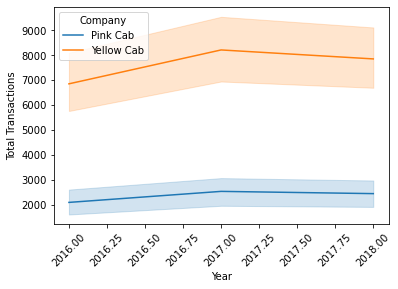

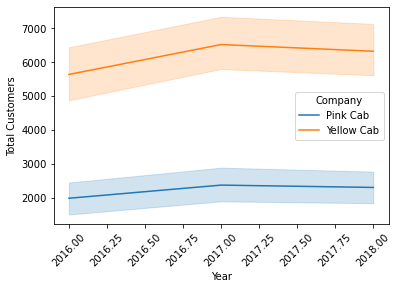

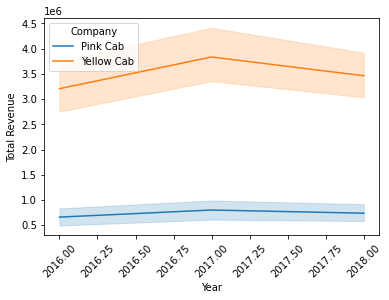

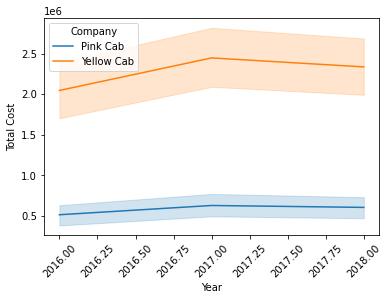

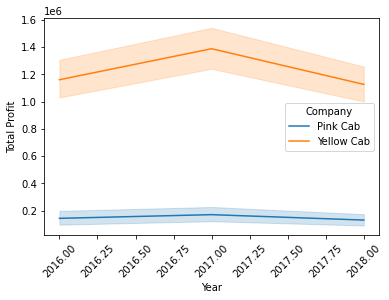

In [136]:

#group data as company year
col_list =grouped_data[['Total Transactions','Total Customers','Total Revenue','Total Cost','Total Profit']]
for col in col_list:
    sns.lineplot(data=grouped_data, x="Year", y=grouped_data[col], hue="Company")
    plt.title=(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Monthly Total Revenue

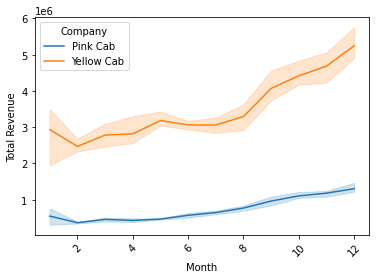

In [121]:


sns.lineplot(data=grouped_data, x="Month", y="Total Revenue", hue="Company")
plt.xticks(rotation=45)
plt.show()

# Number of transactions based on cities for both companies

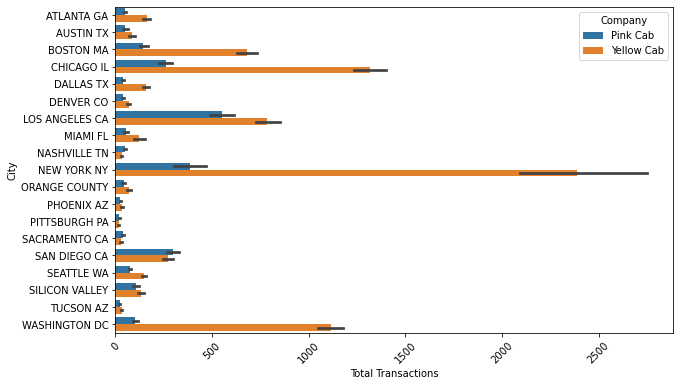

In [145]:

col2 = 'Total Transactions'

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data_city, x=col2, y='City', hue="Company")
plt.xticks(rotation=45)
plt.xlabel(col2)
plt.ylabel('City')
plt.legend(title='Company')
plt.show()


# Avg monthly revenue

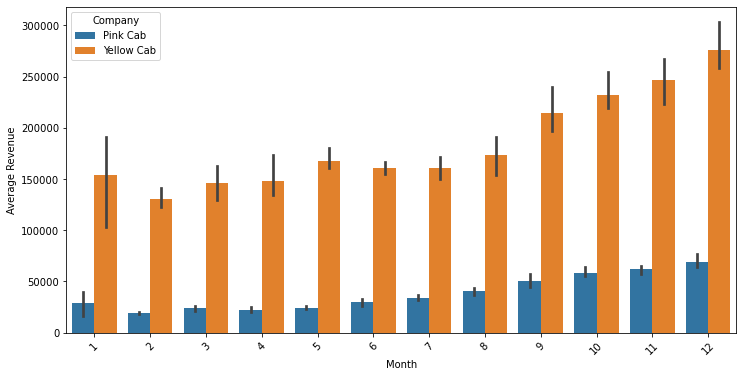

In [146]:


average_monthly_revenue = grouped_data_city.groupby(['Company', 'Year', 'Month'])['Total Revenue'].mean()
average_monthly_revenue

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_monthly_revenue.reset_index(), x='Month', y='Total Revenue', hue='Company')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.show()


# Avg yearly revenue

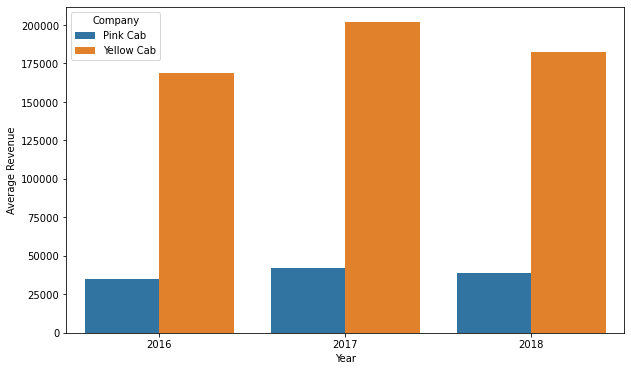

In [147]:
average_yearly_revenue = grouped_data_city.groupby(['Company', 'Year'])['Total Revenue'].mean()
average_yearly_revenue

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_yearly_revenue.reset_index(), x='Year', y='Total Revenue', hue='Company')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.legend(title='Company')
plt.show()


# Customer Segementation based on age,income and gender

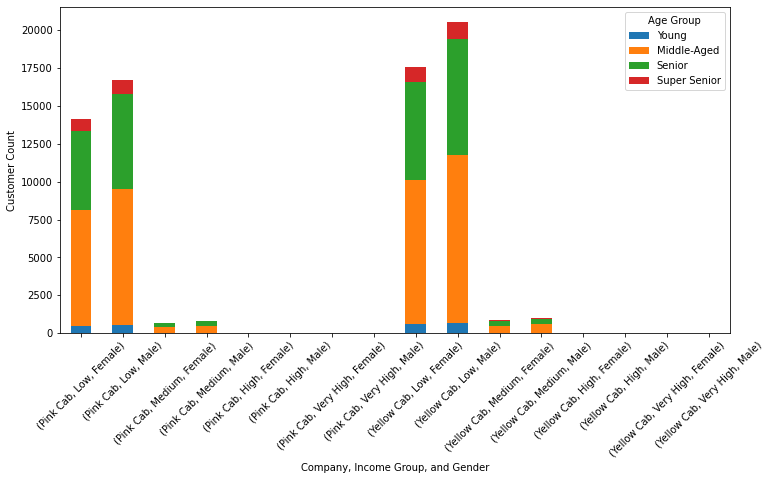

In [154]:

# Income bins
income_bins = [0, 30000, 60000, 90000, 120000]
income_labels = ['Low', 'Medium', 'High', 'Very High']

# Gender and age labels
# Define age bins 
age_bins = [0, 18, 35, 60, 100]
age_labels = ['Young', 'Middle-Aged', 'Senior', 'Super Senior']

gender_labels = ['Male', 'Female']
age_labels = ['Young', 'Middle-Aged', 'Senior', 'Super Senior']

# Calculating income, gender, and age groups
df_final['Income Group'] = pd.cut(df_final['Income (USD/Month)'], bins=income_bins, labels=income_labels)
df_final['Gender'] = df_final['Gender'].replace({'Male': 'Male', 'Female': 'Female'})
df_final['Age Group'] = pd.cut(df_final['Age'], bins=age_bins, labels=age_labels)

# Grouping the data by 'Company', 'Income Group', 'Gender', and 'Age Group' as well as calculating the count of customers
segregation_data = df_final.groupby(['Company', 'Income Group', 'Gender', 'Age Group'])['Customer ID'].nunique().reset_index()

# Creating a DataFrame for plotting
pivoted_data = segregation_data.pivot_table(index=['Company', 'Income Group', 'Gender'], columns='Age Group', values='Customer ID', fill_value=0)

# Plot
pivoted_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Company, Income Group, and Gender')
plt.ylabel('Customer Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()



# Customer Retention

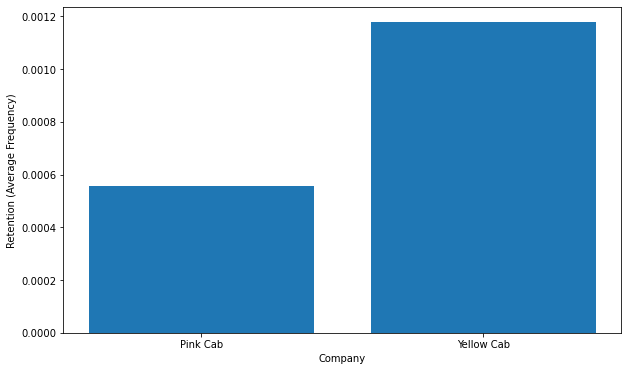

In [173]:

# Grouping the data by 'Company' and 'Customer ID' and calculating the count of occurrences
customer_frequency = df_final.groupby(['Company', 'Customer ID']).size().reset_index(name='Frequency')

# Grouping the data by 'Company' and calculating the number of unique customers
total_customers = customer_frequency.groupby('Company')['Customer ID'].nunique()

# Calculating the average frequency (retention) for each company
customer_frequency['Retention'] = customer_frequency['Frequency'] / total_customers[customer_frequency['Company']].values

# Plot
plt.figure(figsize=(10, 6))
plt.bar(customer_frequency['Company'], customer_frequency['Retention'])
plt.xlabel('Company')
plt.ylabel('Retention (Average Frequency)')
plt.show()

##  Final Recommendation: Investment should be made in Yellow cab as it will be much more profitable and future prospects are promising